In [1]:
import openpharmacophore as oph

# Pharmacophore of ERalpha

We extract a ligand-receptor based pharmacophore for each of the 1000 frames of the MD trajectory of the protein-ligand complex
of estrogen receptor complexed with estradiol

In [2]:
pharmacophore = oph.load("ERalpha.h5")
print(f"Trajectory has {pharmacophore.receptor.traj.n_frames} frames")
lig_ids = pharmacophore.receptor.ligand_ids
print(lig_ids)

/home/daniel/miniconda3/envs/molsys/lib/python3.7/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


Trajectory has 1000 frames
[':B']


In [3]:
pharmacophore.extract(lig_ids[0],
                      frames=list(range(0,1000)),
                      add_hydrogens=False,
                      smiles="C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O")

In [4]:
n_pharma = len(pharmacophore)
print(f"Extracted {n_pharma} pharmacophores")

Extracted 1000 pharmacophores


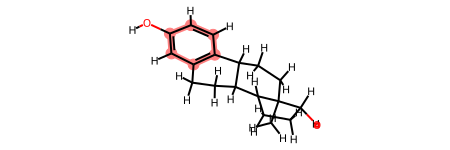

In [5]:
pharmacophore.receptor.ligand

In [6]:
from ipywidgets import interact, fixed, IntSlider

In [7]:
def view_frame(pharma, frame):
    """ Return a view of the pharmacophore at the given frame."""
    return pharma.show(frame=frame)


def interactive_view(pharma):
    """ Returns a view of the pharmacophore with a slider to select
        the desired frame.
    """
    slider = IntSlider(min=0, max=pharma.num_frames-1, step=1, value=0)
    interact(view_frame, pharma=fixed(pharma), frame=slider)

In [8]:
interactive_view(pharmacophore)

interactive(children=(IntSlider(value=0, description='frame', max=999), Output()), _dom_classes=('widget-inter…